# FAIRe Qualitäts-KPIs
Autor: David Büning
Datum: 24.10.2023

## Forschungsfrage
Formulieren Sie eine oder mehrere Forschungsfragen zu der Lerneinheit:

Wie können Aufwand, Verfügbarkeit und Aktzeptanz eines Projektes (in diesem Fall eines Lego-Autos) durch die systematische Erfassung und Analyse von KPIs dokumentiert und verbessert werden? 

## Erstes Fahrzeug


### Versuchsziel
Formulieren Sie ein Versuchsziel für diesen ersten Versuch:

Für mein erstes Fahrzeug versuche ich die Funktion und Stabilität des Autos zu gewährleisten. Mein Fokus liegt darauf, dass das Auto fahren kann und nebenbei achte ich schonmal darauf, die FAIR-Prinzipien und Qualitäten einzuhalten. Mein Ziel ist es so wenig Teile wie möglich zu verbauen, um die Kosten und das Gewicht niedrig zu halten.

### Versuchsaufbau

Bauen Sie ein erstes Fahrzeug aus den gegebenen LEGO-Teilen in der CAD-Software LeoCAD auf.

Hierbei gelten die folgenden Rahmenbedingungen:
- Das Fahrzeug muss aus Baugruppen, Bauteilen und Komponenten bestehen.
- Es muss mindestens vier Räder besitzen
- Es muss sich durch den elektrischen Antrieb fortbewegen können. 
- Die Verwendung eines Getriebes zwischen Motor und Antriebsachse(n) ist verpflichtend. 
- Die Farbe von mindestens einem Teil soll sich von der in LeoCAD hinterlegten Standardfarbe unterscheiden.
- Es sind nur die LEGO-Teile zu verwenden, welche sich in den JSON-Dateien bzw. in
der zur Verfügung gestellten Teilebibliothek befinden.

Fügen Sie eine Abbildung des fertigen Autos in LeoCAD hinzu (*Hinweise: Ein Bild lässt sich mit \!\[Bildbeschreibung](/Pfad/zum/Bild) hinzufügen. Achten Sie darauf, das Bild später auch in Git hinzuzufügen*):


![Auto Eins in LeoCAD](figures/Auto_Eins.png)

Beschreiben Sie kurz und präzise Ihr Fahrzeug:

Mein erstes Auto besteht aus einem Rahmen, in welchem sich der Motor und das Getriebe befinden. Durch einen Querbalken wird der Motor und die Antriebsachse gehalten. Die Vorderachse wird durch eine 90 Grad Zahnrad Verbindung angetrieben. Die Hinterachse ist zweigeteilt und jeweils an einem Außenbalken befestigt. Die Batterie ist auf zwei Haltebalken aufschiebbar und mit den roten Pins befestigbar.

Bauen Sie das Fahrzeug nun in unserem Software-Framework zusammen. Instanziieren Sie die LEGO-Teile und lesen Sie dabei auch die Eigenschaften ein. Ergänzen Sie zusätzliche Eigenschaften, wie z.B. die Farbe. Referenzieren Sie die Teile aufeinander und erstellen Sie auf diese Weise sinnvolle Bauteile, Baugruppen und das
Gesamtsystem. Nutzen Sie die hierfür bereitgestellten Klassendefinitionen und Methoden. Achten Sie auf eine gute Code-Dokumentation. Sie können sich für die Bearbeitung an den zur Verfügung gestellten Code-Zellen orientieren, können hiervon jedoch auch abweichen.

*Hinweise: Achten Sie auf die Unterschiede zum Minimalbeispiel. Eine direkte Kopie ist nicht möglich. Achten Sie außerdem darauf, ein Teil (eindeutig identifiziert durch seine UUID) nicht an mehreren Stellen zu verbauen*

In [20]:
import json
import pprint
from functions import calculation_rules
from functions.classes import *

In [21]:
# initialize components
# erstmal öffne ich alle Datentypen

with open("datasheets/motors.json") as json_file:
    motor = json.load(json_file)
    
with open("datasheets/batteries.json") as json_file:
    batterie = json.load(json_file)
    
with open("datasheets/axles.json") as json_file:
    axles = json.load(json_file)
  
with open("datasheets/frame.json") as json_file:
    frame = json.load(json_file)
    
with open("datasheets/gears.json") as json_file:
    gears = json.load(json_file)
    
with open("datasheets/wheels.json") as json_file:
    wheels = json.load(json_file)
    
    
# 1. Antrieb - Zuerst legen wir alle Komponenten im Antrieb fest
# 1.1. Motor

motor_M = LegoComponent("Motor M", motor["8883-1"])
motor_M.properties["color"] = "grey"

# 1.2. Batterie

batterie_box = LegoComponent("Batterie Box", batterie["8881-1"])
batterie_box.properties["color"] = "grey"

# 1.3. Getriebe - Das Getriebe besteht aus einzelnen Komponenten
# 1.3.1 Achse 

achse_getriebe = LegoComponent("Achse Getriebe", axles["32073"])
achse_getriebe.properties["color"] = "grey"

# 1.3.2 Abstands-/Positionshalter

abstandhalter1_getriebe = LegoComponent("Abstandhalter1", frame["32123"])
abstandhalter1_getriebe.properties["color"] = "grey"
abstandhalter2_getriebe = abstandhalter1_getriebe.clone("Abstandhalter2_Getriebe")

positionshalter1_getriebe = LegoComponent("Positionshalter1 Getriebe", frame["3713"])
positionshalter1_getriebe.properties["color"] = "grey"
positionshalter2_getriebe = positionshalter1_getriebe.clone("Positionshalter2 Getriebe")

# 1.3.3. Zahnräder

zahnrad1_getriebe = LegoComponent("Zahnrad1 Getriebe", gears["32269"])
zahnrad1_getriebe.properties["color"] = "grey"
zahnrad2_getriebe = zahnrad1_getriebe.clone("Zahnrad2 Getriebe")

# 2. Fahrwerk
# 2.1. Achsen
# 2.1.1. Achse vorne

achse_vorne = LegoComponent("Achse Vorne", axles["50451"])
achse_vorne.properties["color"] = "grey"
abstandhalter_rechts_achsevorne = LegoComponent("Abstandhalter Rechts Achse Vorne", frame["32123"])
abstandhalter_rechts_achsevorne.properties["color"] = "grey"
abstandhalter_links_achsevorne = abstandhalter_rechts_achsevorne.clone("Abstandhalter Links Achse Vorne")

# 2.1.2. Achse hinten

achse_hinten_rechts = LegoComponent("Achse Hinten Rechts",axles["32073"])
achse_hinten_rechts.properties["color"] = "grey"
achse_hinten_links = achse_hinten_rechts.clone("Achse Hinten Links")

abstandhalter_rechts_achsehinten = LegoComponent("Abstandhalter Rechts Achse Hinten", frame["32123"])
abstandhalter_rechts_achsehinten.properties["color"] = "grey"
abstandhalter_links_achsehinten = abstandhalter_rechts_achsehinten.clone("Abstandhalter Links Achse Hinten")

richtungsbegrenzer_rechts_achsehinten = LegoComponent("Richtungsbegrenzer Rechts Achse Hinten", frame["32123"])
richtungsbegrenzer_rechts_achsehinten.properties["color"] = "grey"
richtungsbegrenzer_links_achsehinten = richtungsbegrenzer_rechts_achsehinten.clone("Richtungsbegrenzer Links Achse Hinten")

# 2.2. Räder

rad_vorne_links = LegoComponent("Rad Vorne Links",wheels["2903c02"])
rad_vorne_links.properties["color"] = "grey"
rad_vorne_rechts = rad_vorne_links.clone("Rad Vorne Rechts")
rad_hinten_links = rad_vorne_links.clone("Rad Hinten Links")
rad_hinten_rechts = rad_vorne_links.clone("Rad Hinten Rechts")

# 3. Chassis
# 3.1. Balken

balken_rechteckig = LegoComponent("Balken Rechteckig",frame["39790"])
balken_rechteckig.properties["color"] = "grey"

balken_aussen_rechts = LegoComponent("Balken Aussen Rechts",frame["32278"])
balken_aussen_rechts.properties["color"] = "grey"
balken_aussen_links = balken_aussen_rechts.clone("Balken Aussen Links")

balken_batterie_rechts = LegoComponent("Balken Batterie Rechts",frame["40490"])
balken_batterie_rechts.properties["color"] = "grey"
balken_batterie_links = balken_aussen_rechts.clone("Balken Batterie Links")

# 3.2. Pins

connecter_cross_rechts = LegoComponent("Connecter Cross Rechts",frame["48989"])
connecter_cross_rechts.properties["color"] = "grey"
connecter_cross_links = connecter_cross_rechts.clone("Connecter Cross Links")

connecter_perp_rechts = LegoComponent("Connecter Perp Rechts",frame["55615"])
connecter_perp_rechts.properties["color"] = "grey"
connecter_perp_links = connecter_perp_rechts.clone("Connecter Perp Links")

pin1_long_links = LegoComponent("Pin Long Links",frame["32054"])
pin1_long_links.properties["color"] = "grey"
pin2_long_links = pin1_long_links.clone("Pin Long Rechts")
pin1_long_rechts = pin1_long_links.clone("Pin Long Rechts")
pin2_long_rechts = pin1_long_links.clone("Pin Long Rechts")

pin_rechts_motor = LegoComponent("Pin Rechts Motor",frame["3673"])
pin_rechts_motor.properties["color"] = "grey"
pin_links_motor = pin_rechts_motor.clone("Pin Rechts Motor")

pin1_rechts_balken = pin_rechts_motor.clone("Pin1 Rechts Balken")
pin2_rechts_balken = pin_rechts_motor.clone("Pin2 Rechts Balken")
pin1_links_balken = pin_rechts_motor.clone("Pin1 Links Balken")
pin2_links_balken = pin_rechts_motor.clone("Pin2 Links Balken")

In [22]:
# set properties 
#Pin Long an der Batterie werden rot gefärbt

pin1_long_links.properties["color"] = "red"
pin2_long_links.properties["color"] = "red"
pin1_long_rechts.properties["color"] = "red"
pin2_long_rechts.properties["color"] = "red"

pin1_long_links.properties.update(frame["32054"])
pin2_long_links.properties.update(frame["32054"])
pin1_long_rechts.properties.update(frame["32054"])
pin2_long_rechts.properties.update(frame["32054"])

In [23]:
# aggregate components
# Zuerst erstellen wir die Bauteile / Subassemblies:

# Baugruppe 1: Antrieb
# Bauteil 1.1.: Getriebe

getriebe = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "Getriebe Bauteil",
    assembly_method="stick together like lego blocks",
)
getriebe.add([achse_getriebe, abstandhalter1_getriebe, abstandhalter2_getriebe,
            positionshalter1_getriebe, positionshalter2_getriebe, zahnrad1_getriebe,
              zahnrad2_getriebe])

# Baugruppe 2: Fahrwerk
# Bauteil 2.1. Vorderachse
vorderachse = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "Vorderachse Bauteil",
    assembly_method="stick together like lego blocks",
)
vorderachse.add([achse_vorne, abstandhalter_rechts_achsevorne, abstandhalter_links_achsevorne,
                rad_vorne_links, rad_vorne_rechts])

# Bauteil 2.2. Hinterachse
hinterachse = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "Hinterachse Bauteil",
    assembly_method="stick together like lego blocks",
)
hinterachse.add([achse_hinten_rechts, achse_hinten_links, abstandhalter_rechts_achsehinten,
                richtungsbegrenzer_links_achsehinten, rad_hinten_links, rad_hinten_rechts])

# Jetzt erstellen wir die Baugruppen / Assemblies, Antrieb, Fahrwerk und Chassis

# 1. Antrieb
antrieb = LegoAssembly(
    AggregationLayer.ASSEMBLY,
    "Antrieb Baugruppe",
   assembly_method="stick together like lego blocks", 
)

antrieb.add([getriebe,motor_M,batterie_box])

# 2. Fahrwerk
fahrwerk = LegoAssembly(
    AggregationLayer.ASSEMBLY,
    "Fahrwerk Baugruppe",
   assembly_method="stick together like lego blocks", 
)

fahrwerk.add([vorderachse,hinterachse])

# 3. Chassis

chassis = LegoAssembly(
    AggregationLayer.ASSEMBLY,
    "Chassis Baugruppe",
   assembly_method="stick together like lego blocks", 
)

chassis.add([balken_rechteckig, balken_aussen_rechts, balken_aussen_links, 
            balken_batterie_rechts, balken_batterie_links, connecter_cross_rechts, 
            connecter_cross_links, connecter_perp_rechts, connecter_perp_links, pin1_long_links,
            pin2_long_links, pin1_long_rechts, pin2_long_rechts, 
            pin_rechts_motor, pin_links_motor, pin1_rechts_balken, 
            pin2_rechts_balken, pin1_links_balken, pin2_links_balken])

# und zu guter Letzt das System Auto zusammenstellen

auto_eins = LegoAssembly(
    AggregationLayer.SYSTEM,
    "Auto Eins",
   assembly_method="stick together like lego blocks"
)

auto_eins.add([antrieb, fahrwerk, chassis])

### Analyse
Bestimmen Sie die Qualität Ihres Fahrzeugs mittels KPIs.
Die Qualität des Fahrzeugs ist mit mindestens einem KPI je Qualitätsdimension (Aufwand, Verfügbarkeit, Akzeptanz) zu bestimmen. Enwickeln Sie zunächst sinnvolle KPIs, welche mit den gegebenen Daten umsetzbar sind. Halten Sie die Berechnungsvorschriften im Jupyter Notebook fest. Implementieren Sie deren Berechnung für das Gesamtsystem "Fahrzeug" mittels einzelner Funktionen im Skript `calculation_rules`. Sie können zusätzlich Ihre Methoden auch auf die niedrigeren Aggregationsebenen anwenden.

Beschreiben Sie den jeweiligen KPI und geben Sie seine Berechnungsvorschrift an:

$$
a = \frac{b}{c} + d
$$

 __Aufwand__ 
 
 Gesamtkosten:
Hierbei habe ich einfach die Preise der Einzelkomponenten aufeinander addiert:

gesamtkosten = kosten_teil1 + kosten_teil2 + ...


Anzahl der Teile:
Dies war mithilfe der _len_-Funktion möglich:

anzahl = len(Komponentenliste)

Masse:
Hierür habe ich die schon zur Verfügung gestellte Funktion "kpi_mass" benutzt

__Verfügbarkeit__ 

Maximale Lieferzeit: Dies war mithilfe der _max_-Funktion möglich:

maximale_lieferzeit = max(lieferzeit_teil1, lieferzeit_teil2, ...)

__Akzeptanz__ 

Drehmoment: Hierfür habe ich mir das "locking torque" des vorhandenen Motors ausgeben lassen.

Halten Sie die berechneten Werte für die KPIs im Notebook
fest:

In [24]:
#Gesamtmasse berechnen
gesamt_masse_auto_eins = calculation_rules.kpi_mass(auto_eins)
auto_eins.properties["mass [g]"] = gesamt_masse_auto_eins

#Gesamtkosten berechnen
gesamt_kosten_auto_eins = calculation_rules.kpi_cost(auto_eins)
auto_eins.properties["cost [€]"] = gesamt_kosten_auto_eins

#Maximale Lieferzeit berechnen
max_lieferzeit_auto_eins = calculation_rules.kpi_max_delivery_time(auto_eins)
auto_eins.properties["max delivery time [days]"] = max_lieferzeit_auto_eins

#Gesamtanzahl Teile berechnen
anzahl_teile_auto_eins = calculation_rules.kpi_component_number(auto_eins)
auto_eins.properties["components"] = anzahl_teile_auto_eins

#Drehmoment berechnen
drehmoment_auto_eins = motor_M.properties["locking torque [Ncm]"]
auto_eins.properties["locking torque [Ncm]"] = drehmoment_auto_eins

In [25]:
print("Gesamtmasse: ", gesamt_masse_auto_eins, "Gramm")
print("Gesamtkosten: ", gesamt_kosten_auto_eins, "€")
print("Maximale Lieferzeit: ", max_lieferzeit_auto_eins, "Tage")
print("Gesamtanzahl Teile: ", anzahl_teile_auto_eins)
print("Drehmoment: ", drehmoment_auto_eins, "Ncm" )

Gesamtmasse:  377.96000000000004 Gramm
Gesamtkosten:  41.472999999999956 €
Maximale Lieferzeit:  13 Tage
Gesamtanzahl Teile:  39
Drehmoment:  11 Ncm


Exportieren Sie schließlich Ihr entworfenes Fahrzeug inklusive der entwickelten KPIs:

In [26]:
# export car and its properties

with open("auto_eins.json", "w") as fp:
    json.dump(auto_eins.to_dict(), fp, cls=KPIEncoder, indent=4)

## Zweites Fahrzeug

### Versuchsziel

Setzen Sie sich ein Ziel, welche Qualitätsdimensionen in einem zweiten Fahrzeug verbessert werden sollen und bauen
Sie darauf aufbauend ein zweites Fahrzeug aus den gegebenen LEGO-Teilen auf.
Die Anforderungen an das Fahrzeug sind identisch zum ersten. Wählen Sie die Einzelteile und deren Zusammenspiel entsprechend Ihrer Zielstellung aus.

Formulieren Sie ein Versuchsziel für diesen Versuch. Beschreiben Sie unter anderem, welche Verbesserung Sie vornehmen möchten:

Ich versuche mit dem zweiten Fahrzeug meine analysierten Werte durch die KPI's zu verbessern. Im besten Fall gelingt es mir die Funktion beizubehalten und wünschensweise noch auszubauen, während ich die drei Qualitätsdimensionen verbessern kann. Konkret versuche ich die Leistung zu verbessern, während ich Kosten, Anzahl der Teile, maximale Lieferzeit und Masse verringern kann.

### Versuchsaufbau

Fügen Sie eine Abbildung des fertigen Autos in LeoCAD hinzu:

![Auto Zwei in LeoCAD](figures/Auto_Zwei.png)

Beschreiben Sie kurz und präzise den Aufbau des zweiten Fahrzeugs:

Mein zweites Fahrzeug hat als Chassis nur noch den Rahmen. In diesem befindet sich nun ein leistungsstärkerer Motor und das gleiche Getriebe. Durch die kleineren Reifen war es mir möglich, auch die Hinterachse an den Rahmen zu befestigen, sodass ich mir zwei Balken an den Seiten sparen kann. Zudem habe ich eine günstigere Batterie eingebaut, die sich mehr in der Mitte und somit des gewünschten Schwerpunkts befindet.

Erstellen Sie das Fahrzeug in unserem Softwareframework:

In [27]:
# initialize components

# erstmal öffne ich wieder alle Datentypen

with open("datasheets/motors.json") as json_file:
    motor = json.load(json_file)
    
with open("datasheets/batteries.json") as json_file:
    batterie = json.load(json_file)
    
with open("datasheets/axles.json") as json_file:
    axles = json.load(json_file)
  
with open("datasheets/frame.json") as json_file:
    frame = json.load(json_file)
    
with open("datasheets/gears.json") as json_file:
    gears = json.load(json_file)
    
with open("datasheets/wheels.json") as json_file:
    wheels = json.load(json_file)
    
    
# 1. Antrieb - Zuerst legen wir alle Komponenten im Antrieb fest
# 1.1. Motor

motor_L = LegoComponent("Motor L", motor["88003-1"])
motor_L.properties["color"] = "grey"

# 1.2. Batterie

batterie_box = LegoComponent("Batterie Box", batterie["2847c01"])
batterie_box.properties["color"] = "grey"

# 1.3. Getriebe - Das Getriebe besteht aus einzelnen Komponenten
# 1.3.1 Achse 

achse_getriebe = LegoComponent("Achse Getriebe", axles["32073"])
achse_getriebe.properties["color"] = "grey"

# 1.3.2 Abstands-/Positionshalter

abstandhalter1_getriebe = LegoComponent("Abstandhalter1", frame["32123"])
abstandhalter1_getriebe.properties["color"] = "grey"
abstandhalter2_getriebe = abstandhalter1_getriebe.clone("Abstandhalter2_Getriebe")

positionshalter1_getriebe = LegoComponent("Positionshalter1 Getriebe", frame["3713"])
positionshalter1_getriebe.properties["color"] = "grey"
positionshalter2_getriebe = positionshalter1_getriebe.clone("Positionshalter2 Getriebe")

# 1.3.3. Zahnräder

zahnrad1_getriebe = LegoComponent("Zahnrad1 Getriebe", gears["32269"])
zahnrad1_getriebe.properties["color"] = "grey"
zahnrad2_getriebe = zahnrad1_getriebe.clone("Zahnrad2 Getriebe")

# 2. Fahrwerk
# 2.1. Achsen
# 2.1.1. Achse vorne

achse_vorne = LegoComponent("Achse Vorne", axles["50451"])
achse_vorne.properties["color"] = "grey"
abstandhalter_rechts_achsevorne = LegoComponent("Abstandhalter Rechts Achse Vorne", frame["32123"])
abstandhalter_rechts_achsevorne.properties["color"] = "grey"
abstandhalter_links_achsevorne = abstandhalter_rechts_achsevorne.clone("Abstandhalter Links Achse Vorne")

# 2.1.2. Achse hinten

achse_hinten_rechts = LegoComponent("Achse Hinten Rechts",axles["32073"])
achse_hinten_rechts.properties["color"] = "grey"
achse_hinten_links = achse_hinten_rechts.clone("Achse Hinten Links")

abstandhalter_rechts_achsehinten = LegoComponent("Abstandhalter Rechts Achse Hinten", frame["32123"])
abstandhalter_rechts_achsehinten.properties["color"] = "grey"
abstandhalter_links_achsehinten = abstandhalter_rechts_achsehinten.clone("Abstandhalter Links Achse Hinten")

richtungsbegrenzer_rechts_achsehinten = LegoComponent("Richtungsbegrenzer Rechts Achse Hinten", frame["32123"])
richtungsbegrenzer_rechts_achsehinten.properties["color"] = "grey"
richtungsbegrenzer_links_achsehinten = richtungsbegrenzer_rechts_achsehinten.clone("Richtungsbegrenzer Links Achse Hinten")

# 2.2. Räder

rad_vorne_links = LegoComponent("Rad Vorne Links",wheels["56904c02"])
rad_vorne_links.properties["color"] = "grey"
rad_vorne_rechts = rad_vorne_links.clone("Rad Vorne Rechts")
rad_hinten_links = rad_vorne_links.clone("Rad Hinten Links")
rad_hinten_rechts = rad_vorne_links.clone("Rad Hinten Rechts")

# 3. Chassis
# 3.1. Balken

balken_rechteckig = LegoComponent("Balken Rechteckig",frame["39790"])
balken_rechteckig.properties["color"] = "grey"

balken_batterie_rechts_unten = LegoComponent("Balken Batterie Rechts Unten",frame["3702"])
balken_batterie_rechts.properties["color"] = "grey"
balken_batterie_links_unten = balken_aussen_rechts.clone("Balken Batterie Links Unten")

balken_batterie_rechts_oben = LegoComponent("Balken Batterie Rechts Oben",frame["3701"])
balken_batterie_rechts.properties["color"] = "grey"
balken_batterie_links_oben = balken_aussen_rechts.clone("Balken Batterie Links Oben")

# 3.2. Pins

connecter_perp_rechts = LegoComponent("Connecter Perp Rechts",frame["55615"])
connecter_perp_rechts.properties["color"] = "grey"
connecter_perp_links = connecter_perp_rechts.clone("Connecter Perp Links")

pin_rechts_motor = LegoComponent("Pin Rechts Motor",frame["3673"])
pin_rechts_motor.properties["color"] = "grey"
pin_links_motor = pin_rechts_motor.clone("Pin Rechts Motor")

pin1_rechts_motor = pin_rechts_motor.clone("Pin1 Rechts Balken")
pin2_rechts_motor = pin_rechts_motor.clone("Pin2 Rechts Balken")
pin1_links_motor = pin_rechts_motor.clone("Pin1 Links Balken")
pin2_links_motor = pin_rechts_motor.clone("Pin2 Links Balken")

In [28]:
# Die Pins am Motor sollen schwarz sein

pin1_rechts_motor.properties["color"] = "black"
pin2_rechts_motor.properties["color"] = "black"
pin1_links_motor.properties["color"] = "black"
pin2_links_motor.properties["color"] = "black"

pin1_rechts_motor.properties.update(frame["3673"])
pin2_rechts_motor.properties.update(frame["3673"])
pin1_links_motor.properties.update(frame["3673"])
pin2_links_motor.properties.update(frame["3673"])


In [29]:
# aggregate components

#Zuerst erstellen wir die Bauteile / Subassemblies:

# Baugruppe 1: Antrieb
# Bauteil 1.1.: Getriebe

getriebe = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "Getriebe Bauteil",
    assembly_method="stick together like lego blocks",
)
getriebe.add([achse_getriebe, abstandhalter1_getriebe, abstandhalter2_getriebe,
            positionshalter1_getriebe, positionshalter2_getriebe, zahnrad1_getriebe,
              zahnrad2_getriebe])

# Baugruppe 2: Fahrwerk
# Bauteil 2.1. Vorderachse
vorderachse = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "Vorderachse Bauteil",
    assembly_method="stick together like lego blocks",
)
vorderachse.add([achse_vorne, abstandhalter_rechts_achsevorne, abstandhalter_links_achsevorne,
                rad_vorne_links, rad_vorne_rechts])

# Bauteil 2.2. Hinterachse
hinterachse = LegoAssembly(
    AggregationLayer.SUBASSEMBLY,
    "Hinterachse Bauteil",
    assembly_method="stick together like lego blocks",
)
hinterachse.add([achse_hinten_rechts, achse_hinten_links, abstandhalter_rechts_achsehinten,
                richtungsbegrenzer_links_achsehinten, rad_hinten_links, rad_hinten_rechts])

# Jetzt erstellen wir die Baugruppen / Assemblies, Antrieb, Fahrwerk und Chassis

# 1. Antrieb
antrieb = LegoAssembly(
    AggregationLayer.ASSEMBLY,
    "Antrieb Baugruppe",
   assembly_method="stick together like lego blocks", 
)

antrieb.add([getriebe,motor_L,batterie_box])

# 2. Fahrwerk
fahrwerk = LegoAssembly(
    AggregationLayer.ASSEMBLY,
    "Fahrwerk Baugruppe",
   assembly_method="stick together like lego blocks", 
)

fahrwerk.add([vorderachse,hinterachse])

# 3. Chassis

chassis = LegoAssembly(
    AggregationLayer.ASSEMBLY,
    "Chassis Baugruppe",
   assembly_method="stick together like lego blocks", 
)

chassis.add([balken_rechteckig, connecter_perp_rechts, 
            connecter_perp_links, pin_rechts_motor, pin_links_motor,  
            pin1_rechts_motor, pin2_rechts_motor, pin1_links_motor, pin2_links_motor, 
            balken_batterie_rechts_unten, balken_batterie_rechts_oben, 
            balken_batterie_links_unten, balken_batterie_links_oben])

# und zu guter Letzt das System Auto zusammenstellen

auto_zwei = LegoAssembly(
    AggregationLayer.SYSTEM,
    "Auto Zwei",
   assembly_method="stick together like lego blocks"
)

auto_zwei.add([antrieb, fahrwerk, chassis])

### Analyse
Bestimmen Sie die KPIs des zweiten Fahrzeugs

In [30]:
#Gesamtmasse berechnen
gesamt_masse_auto_zwei = calculation_rules.kpi_mass(auto_zwei)
auto_zwei.properties["mass [g]"] = gesamt_masse_auto_zwei

#Gesamtkosten berechnen
gesamt_kosten_auto_zwei = calculation_rules.kpi_cost(auto_zwei)
auto_zwei.properties["cost [€]"] = gesamt_kosten_auto_zwei

#Maximale Lieferzeit berechnen
max_lieferzeit_auto_zwei = calculation_rules.kpi_max_delivery_time(auto_zwei)
auto_zwei.properties["max delivery time [days]"] = max_lieferzeit_auto_zwei

#Gesamtanzahl Teile berechnen
anzahl_teile_auto_zwei = calculation_rules.kpi_component_number(auto_zwei)
auto_zwei.properties["components"] = anzahl_teile_auto_zwei

#Drehmoment berechnen
drehmoment_auto_zwei = motor_L.properties["locking torque [Ncm]"]
auto_zwei.properties["locking torque [Ncm]"] = drehmoment_auto_zwei

In [31]:
print("Gesamtmasse: ", gesamt_masse_auto_zwei, "Gramm")
print("Gesamtkosten: ", gesamt_kosten_auto_zwei, "€")
print("Maximale Lieferzeit: ", max_lieferzeit_auto_zwei, "Tage")
print("Gesamtanzahl Teile: ", anzahl_teile_auto_zwei)
print("Drehmoment: ", drehmoment_auto_zwei, "Ncm" )

Gesamtmasse:  310.22 Gramm
Gesamtkosten:  21.56300000000003 €
Maximale Lieferzeit:  13 Tage
Gesamtanzahl Teile:  33
Drehmoment:  18 Ncm


Exportieren Sie Ihr Fahrzeug inklusive der KPIs:

In [32]:
# export car and its properties

with open("auto_zwei.json", "w") as fp:
    json.dump(auto_zwei.to_dict(), fp, cls=KPIEncoder, indent=4)


## Diskussion
### Ergebnisse
Stellen Sie die entwickelten KPIs beider Fahrzeuge gegenüber und wählen Sie hierfür unter anderem eine geeignete
grafische Darstellung. Stellen Sie dabei insbesondere sicher, dass die Datengrundlage ersichtlich ist. Halten Sie
auch die Plotbefehle im Notebook fest:

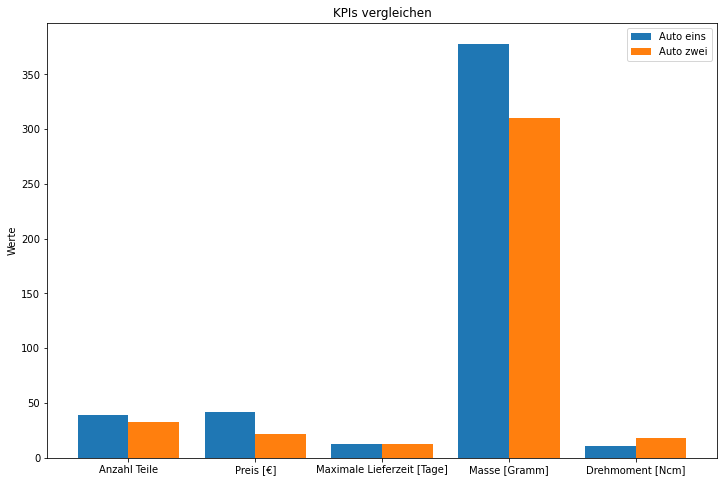

<Figure size 432x288 with 0 Axes>

In [33]:
import numpy as np
import matplotlib.pyplot as plt

X = ['Anzahl Teile', 'Preis [€]', 'Maximale Lieferzeit [Tage]', 'Masse [Gramm]', 'Drehmoment [Ncm]']

auto_1 =[auto_eins.properties["components"],
    auto_eins.properties["cost [€]"],
    auto_eins.properties["max delivery time [days]"],
    auto_eins.properties["mass [g]"],
    auto_eins.properties["locking torque [Ncm]"]]

auto_2 = [auto_zwei.properties["components"],
    auto_zwei.properties["cost [€]"],
    auto_zwei.properties["max delivery time [days]"],
    auto_zwei.properties["mass [g]"],
    auto_zwei.properties["locking torque [Ncm]"]]

X_axis = np.arange(len(X))
plt.figure(figsize=(12,8))
plt.bar(X_axis-0.2, auto_1 ,0.4 ,label = 'Auto eins')
plt.bar(X_axis+0.2, auto_2 , 0.4 ,label ='Auto zwei')

plt.xticks(X_axis,X)
plt.ylabel("Werte")
plt.title("KPIs vergleichen")
plt.legend()
plt.show()
plt.savefig('Auto KPI Vergleich')

Interpretieren Sie Ihre Ergebnisse. Vergleichen Sie die KPIs Ihrer Autos. Konnten Sie Ihre gewünschte Verbesserung erzielen? Welche Schlüsse ziehen Sie aus den Ergebnissen für die Qualität der beiden
Fahrzeuge?

Wie man sehen kann konnte ich __Aufwand__ und __Aktzeptanz__ verbessern, indem ich die Anzahl der Teile reduziert habe, den Preis und die Masse verringern konnte, während ich das Drehmoment des Motors erhöhen konnte. Demnach konnte ich meine Verbesserungen, bis auf die __Verfügbarkeit__, die gleich geblieben ist, erzielen. Man kann also klar sagen, dass die Qualität insgesamt von meinem zweiten Auto höher ist, als von meinem ersten.

Diskutieren Sie, inwieweit Ihre entwickelten KPIs die im Skript erläuterten FAIR-Prinzipien erfüllen:

__Findable:__ Die Daten sind eindeutig identifiziert, in dem sie alle einen eigenen, universellen Dateinamen bekommen haben.

__Accessible:__ Die Informationen der Daten sind erreichbar durch GitLab, auch wenn die Daten selbst nicht mehr zur Verfügung stehen.

__Interoperable:__ Die KPI's wurden in der Python Sprache programmiert, die weit verbreitet und verständlich ist.

__Reusable:__ Die Daten der Autos wurden mit verschiedenen, unterscheidbaren Attributen definiert.

## Fazit

Ziehen Sie ein persönliches Fazit. Was haben Sie Neues gelernt?

Ich konnte bei dieser Aufgabenstellung einiges mitnehmen. Erstmal habe ich einen soliden Umgang mit den Systemen jupyterhub und GitLab erreichen können. Ich habe alle Funktionen, mit denen ich in der Theorie davor noch nicht viel anfangen konnte, praktisch angewandt und vollständig inhaltlich und sinnlich verstanden. Besonders der Sinn hinter und Umgang mit GitLab hat sich für mich klar verdeutlicht und ich freue mich auf zukünftige Projekte mit diesem Programm. Auch die Möglichkeiten und Potenziale von JupyterHub sind mir deutlicher geworden. 
Zudem habe ich gelernt was KPI's sind und wie man sie anwenden kann, um die Qualität von Systemen zu dokumentieren und zu verbessern. 
Auch die Anwendung von LeoCAD war für mich neu und hat mir viel Spaß gemacht.